# 1. MNIST data in TF

## 1.1 load data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 1.2 check data

In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.train.labels.shape

(55000, 10)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.test.labels.shape

(10000, 10)

In [7]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

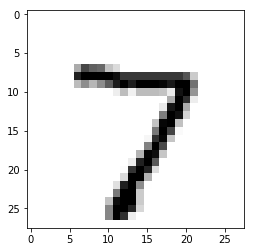

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(mnist.test.images[0].reshape(28,28), cmap=cm.binary)
plt.show()


# 2. Create session and placeholder

In [9]:
import tensorflow as tf

sess = tf.InteractiveSession()# create session
x = tf.placeholder(tf.float32, [None, 784]) # data type, data size

# 3. softmax function

In [10]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 4. loss function

In [11]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

# 5. SGD (Stochastic Gradient Descent)

In [12]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [13]:
tf.global_variables_initializer().run()

# 6. Train

In [14]:
for i in range(1000):
    batch_xs , batch_ys = mnist.train.next_batch(100)
    train_step.run({x: batch_xs, y_:batch_ys})

# 7. Prediction result

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [18]:
accuracy.eval({x:mnist.test.images, y_:mnist.test.labels})

0.91570002